<a href="https://colab.research.google.com/github/NamVMHA/Company_A_sells_fashion-K-means-/blob/main/Company_A_sells_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><font color = 'orange'> [Phạm Thanh Nam] - Company A sells fashion <font></h1>

### Metadata

| **Source** | **Description** | **Link** | 
| ----------------- | ------- | ---------- | 
| Customers & Transactions | Thông tin khách hàng và transaction, cả online lẫn instore      | Customers   |
| Website Traffic | ebsite traffic data cho từng trang sản phẩm (Từ tháng 1 đến tháng 12 năm 2020) | Traffic  |


<h2> Context </h2>

- Company A sells fashion. They have stores in: UK (London); FR (Paris); IT (Milan); GER (Berlin) - online or store. 

- Thay have a webisite online store. In some cases, the page might have gone up after the product was put up for sale. 

<h2> Requirements </h2>

  + What is the impact of our website traffic on revenue? 
  + Which products get us pageviews and revenue?
  + What customer segments are there?


In [1]:
# Import lib
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

print('import done!')

import done!


In [2]:
# Import data

url='https://docs.google.com/spreadsheets/d/1G3LSUuq3eVvhr3Auc86HCpqpKAmt-Ig8/edit#gid=1575017880'

file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

customer_info = pd.read_excel(dwn_url ,sheet_name=0)

customer_info.head()

,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
0,0.0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N
1,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2015-12-21,M,2009-10-06,Y
2,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,2015-12-22,F,1990-08-04,Y
3,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,2015-12-22,M,1974-07-24,N
4,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,2015-12-22,M,1981-08-13,N


In [3]:
#Chuyển cột ID thành dạng số nguyên
customer_info['ID'] = customer_info['ID'].astype('int64')

In [4]:
# Import sheet 2
items = pd.read_excel(dwn_url ,sheet_name=1)
items.head()


,ItemID,Product,Brand,SellPrice,CostPrice
0,1.0,032irview0.686128260621012,"Ki)D3jDmA,RIP68X",943.0,359.0
1,2.0,070ttream0.518887735674677,GO4582ey<S!+k1VE,717.0,207.0
2,3.0,070htream0.333307794468401,G.Kb^jz*soY!(-4Q,739.0,199.0
3,4.0,100Grseys0.271522111052549,Dr|vm[-5p~56Y\mk,532.0,262.0
4,5.0,100[nside0.645837365801341,Dr|vm[-5p~56Y\mk,593.0,392.0


In [5]:
#Chuyển các cột thành dạng số nguyên
items[['ItemID','SellPrice','CostPrice']] = items[['ItemID','SellPrice','CostPrice']].astype('int64')

In [6]:
# Import sheet 3

customer_transactions = pd.read_excel(dwn_url ,sheet_name=2)
customer_transactions.head()

,OrderID,CustomerID,ItemID,TransactionDate,Channel
0,0.0,0.0,352.0,2020-03-21,In Store
1,0.0,0.0,3433.0,2020-07-14,In Store
2,0.0,0.0,11162.0,2020-08-09,In Store
3,0.0,0.0,13011.0,2020-12-07,In Store
4,0.0,0.0,13885.0,2020-11-08,In Store


In [7]:
#Chuyển các cột thành dạng số nguyên
customer_transactions[['OrderID','CustomerID','ItemID']] = customer_transactions[['OrderID','CustomerID','ItemID']].astype('int64')

In [8]:
# Import traffic data
url1='https://docs.google.com/spreadsheets/d/182rsVQ39k5v_AvNKl-HHIY6STgB_Xapi/edit#gid=2046733701'
file_id1=url1.split('/')[-2]
dwn_url1='https://drive.google.com/uc?id=' + file_id1
traffic_01 = pd.read_excel(dwn_url1 ,sheet_name=0)

url2='https://docs.google.com/spreadsheets/d/1XPInl7PlahCtFH-I9Nz53a-pLd5jYOgs/edit?rtpof=true#gid=1283808233'
file_id2=url2.split('/')[-2]
dwn_url2='https://drive.google.com/uc?id=' + file_id2
traffic_02 = pd.read_excel(dwn_url2 ,sheet_name=0)

url3='https://docs.google.com/spreadsheets/d/1O_3Eb8kOjdwl7hUzH6dU6xgmKlUnHt9P/edit?usp=sharing&ouid=102056697382294984777&rtpof=true&sd=true'
file_id3=url3.split('/')[-2]
dwn_url3='https://drive.google.com/uc?id=' + file_id3
traffic_03 = pd.read_excel(dwn_url3 ,sheet_name=0)

url4='https://docs.google.com/spreadsheets/d/1E7vmPIPjw3IuSCu_gJMLi0_5mcJKGNOG/edit?usp=sharing&ouid=102056697382294984777&rtpof=true&sd=true'
file_id4=url4.split('/')[-2]
dwn_url4='https://drive.google.com/uc?id=' + file_id4
traffic_04 = pd.read_excel(dwn_url4 ,sheet_name=0)

url5='https://docs.google.com/spreadsheets/d/14e1oH3SWB68jLWxfUEa466unPFx78FBn/edit?usp=sharing&ouid=102056697382294984777&rtpof=true&sd=true'
file_id5=url5.split('/')[-2]
dwn_url5='https://drive.google.com/uc?id=' + file_id5
traffic_05 = pd.read_excel(dwn_url5 ,sheet_name=0)

url6='https://docs.google.com/spreadsheets/d/1lv6Ag_N8aSS_UKIGWyJl2KsI2C4H18xZ/edit?usp=sharing&ouid=102056697382294984777&rtpof=true&sd=true'
file_id6=url6.split('/')[-2]
dwn_url6='https://drive.google.com/uc?id=' + file_id6
traffic_06 = pd.read_excel(dwn_url6 ,sheet_name=0)

url7='https://docs.google.com/spreadsheets/d/1WrKgty3iredbu6vvdUQyYilV8g1IykKR/edit?usp=sharing&ouid=102056697382294984777&rtpof=true&sd=true'
file_id7=url7.split('/')[-2]
dwn_url7='https://drive.google.com/uc?id=' + file_id7
traffic_07 = pd.read_excel(dwn_url7 ,sheet_name=0)

url8='https://docs.google.com/spreadsheets/d/1ZNJ1RijDspfreQiEW_nTdidoRkYd0cRu/edit?usp=sharing&ouid=102056697382294984777&rtpof=true&sd=true'
file_id8=url8.split('/')[-2]
dwn_url8='https://drive.google.com/uc?id=' + file_id8
traffic_08 = pd.read_excel(dwn_url8 ,sheet_name=0)

url9='https://docs.google.com/spreadsheets/d/17hn3U2alLFHaXDkxGnnhssgF13nLd1s8/edit?usp=sharing&ouid=102056697382294984777&rtpof=true&sd=true'
file_id9=url9.split('/')[-2]
dwn_url9='https://drive.google.com/uc?id=' + file_id9
traffic_09 = pd.read_excel(dwn_url9 ,sheet_name=0)

url10='https://docs.google.com/spreadsheets/d/1MXS-Py5iFi2lflkXOfesa3z-lob6kD7w/edit?usp=sharing&ouid=102056697382294984777&rtpof=true&sd=true'
file_id10=url10.split('/')[-2]
dwn_url10='https://drive.google.com/uc?id=' + file_id10
traffic_10 = pd.read_excel(dwn_url10 ,sheet_name=0)

url11='https://docs.google.com/spreadsheets/d/12VfoP4UjJEvggT9NuGwFWZwPuM6_Wbas/edit?usp=sharing&ouid=102056697382294984777&rtpof=true&sd=true'
file_id11=url11.split('/')[-2]
dwn_url11='https://drive.google.com/uc?id=' + file_id11
traffic_11 = pd.read_excel(dwn_url11 ,sheet_name=0)

url12='https://docs.google.com/spreadsheets/d/17TtpnLuzEWr1DU9bEtRCbH6X0CvDv1Fr/edit?usp=sharing&ouid=102056697382294984777&rtpof=true&sd=true'
file_id12=url12.split('/')[-2]
dwn_url12='https://drive.google.com/uc?id=' + file_id12
traffic_12 = pd.read_excel(dwn_url12 ,sheet_name=0)



In [9]:
 # Ghộp data
traffics = pd.concat([traffic_01, traffic_02,traffic_03,traffic_04,traffic_05,\
                     traffic_06,traffic_07,traffic_08,traffic_09,traffic_10,traffic_11,traffic_12],\
                    ignore_index=True)
traffics

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY)
0,/2020/1/032irview0.686128260621012,5669.2,5777.8,6286.4,"Ki)D3jDmA,RIP68X",2020-01-10 16:56:13
1,/2020/1/070ttream0.518887735674677,359.8,370.4,403.4,GO4582ey<S!+k1VE,2020-01-10 05:04:35
2,/2020/1/070htream0.333307794468401,587.6,614.2,657.6,G.Kb^jz*soY!(-4Q,2020-01-16 23:27:08
3,/2020/1/100Grseys0.271522111052549,1284.0,1308.6,1385.4,Dr|vm[-5p~56Y\mk,2020-01-17 12:32:24
4,/2020/1/100[nside0.645837365801341,1846.0,1880.8,2025.0,Dr|vm[-5p~56Y\mk,2020-01-23 05:21:08
...,...,...,...,...,...,...
17884,/2020/12/yinfbowls0.6558670149224,130.0,133.2,142.2,HoXbja)_x007f_qT:ESE8#,2020-12-01 04:55:35
17885,/2020/12/yosolease0.0455049365834417,314.6,325.6,365.2,"YoRQW7@*&5W+~4Y""",2020-12-03 15:25:00
17886,/2020/12/you^-info0.127669879156147,1419.6,1448.4,1615.8,"MouDd/fn,XEARhBp",2020-12-06 23:57:54
17887,/2020/12/youe-info0.729842478879044,483.8,487.6,509.6,"yo4}AUKGso=,?!DX",2020-12-04 05:59:22


In [10]:
 # Tạo cột Product 
traffics['Product'] = range(len(traffics['Page URL']))
for i in range(len(traffics['Page URL'])):
    traffics['Product'][i] = traffics['Page URL'].iloc[i].split('/')[-1]

In [11]:
# sắp xếp lại bảng theo thứ tự ngày tháng
traffics.sort_values('Posted On (DD/MM/YYYY)', ascending=True, inplace=True, ignore_index=True)
traffics

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY),Product
0,/2020/1/vanBip-on0.100834672919284,1034.8,1048.4,1134.4,"Vag9""-Z=gN30ND@[",2020-01-01 01:03:02,vanBip-on0.100834672919284
1,/2020/1/fujBdence0.385183712192661,4097.8,4142.6,4457.2,ToOYo&o|?(;MH>V:,2020-01-01 01:46:40,fujBdence0.385183712192661
2,/2020/1/baiXpsule0.236876019278184,642.6,653.8,726.8,PaasB'\_LlDEk`=W,2020-01-01 02:55:07,baiXpsule0.236876019278184
3,/2020/1/artjriner0.183950395687591,3413.0,3469.6,3795.6,Ro7|R40![FY$PS`<,2020-01-01 04:18:00,artjriner0.183950395687591
4,/2020/1/appMn-usd0.284138838758011,1447.0,1465.6,1562.6,MiUNo1$pZkrlcw>M,2020-01-01 04:35:14,appMn-usd0.284138838758011
...,...,...,...,...,...,...,...
17884,/2020/12/nicKailer0.757067004243723,369.4,375.8,398.6,NiBtFC>$5gmngibT,2020-12-09 22:18:15,nicKailer0.757067004243723
17885,/2020/12/j-crvideo0.411325399883596,408.6,419.0,445.0,"J.>4'""@8pZooN<m.",2020-12-09 22:42:10,j-crvideo0.411325399883596
17886,/2020/12/asak-info0.272774402976534,286.8,291.8,307.6,AsX8Ks>t}q)0=|~C,2020-12-09 22:56:43,asak-info0.272774402976534
17887,/2020/12/andx-info0.805313550947187,1430.4,1457.8,1580.0,MaYv(\vK4F{`#->J,2020-12-09 23:20:17,andx-info0.805313550947187


In [12]:
# Merge data
data = customer_transactions.merge(customer_info,how='inner',left_on='CustomerID', right_on='ID').\
                    merge(items,how='inner',left_on='ItemID', right_on='ItemID')
data.drop('ID', inplace=True, axis=1)
data

,OrderID,CustomerID,ItemID,TransactionDate,Channel,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter,Product,Brand,SellPrice,CostPrice
0,0,0,352,2020-03-21,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735,426
1,637,57,352,2020-03-15,In Store,Var0.0876970591979241,Bhan0.0592432181453122,GER - Germany,2016-02-02,F,1966-01-14,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735,426
2,0,0,3433,2020-07-14,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491
3,1840,167,3433,2020-05-16,In Store,Y0.694526245425698,Pur0.889218979929135,UK - United Kingdom,2015-04-16,M,1972-03-23,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491
4,3386,307,3433,2020-04-23,In Store,Moh0.478682882191102,Khair0.475794987205303,FR - France,2016-06-02,NaN,1989-05-04,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25208,8358,769,15836,2020-10-14,In Store,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,offqrview0.479298708383635,Vi1[g>Gp]F76d[;',197,146
25209,8359,769,5847,2020-05-27,Online,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,nnactream0.0225798759099386,"NN`~?6_x007f_^%O*KH,[S",833,280
25210,8362,769,8727,2020-11-18,In Store,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,g-snation0.0993461911005428,WaQqK)2JxI(=dac=,205,66
25211,8362,769,13065,2020-05-11,In Store,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,undflease0.156012002899051,"Uny~Y,~<rTC^J6py",1012,272


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25213 entries, 0 to 25212
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          25213 non-null  int64         
 1   CustomerID       25213 non-null  int64         
 2   ItemID           25213 non-null  int64         
 3   TransactionDate  25213 non-null  datetime64[ns]
 4   Channel          25213 non-null  object        
 5   FirstName        25213 non-null  object        
 6   LastName         25213 non-null  object        
 7   Country          25213 non-null  object        
 8   DateJoined       25213 non-null  datetime64[ns]
 9   Gender           16892 non-null  object        
 10  Birthday         25213 non-null  datetime64[ns]
 11  Newsletter       25213 non-null  object        
 12  Product          25213 non-null  object        
 13  Brand            25213 non-null  object        
 14  SellPrice        25213 non-null  int64

<h2><font color = 'orange'> What is the impact of our website traffic on revenue? <font></h2>

### Orders, items and revenue by Transaction date between two channels: In Store and Online

In [14]:
Channel_amounts = data.groupby(["TransactionDate","Channel"]).\
                            agg(Orders = ('OrderID','nunique'),Total_items = ('ItemID','size'), Revenue = ('SellPrice','sum')).\
                            reset_index().set_index('TransactionDate')

In [15]:
Channel_amounts

,Channel,Orders,Total_items,Revenue
TransactionDate,,,,
2020-01-01,In Store,30,30,23820
2020-01-01,Online,35,36,32044
2020-01-02,In Store,33,33,24069
2020-01-02,Online,40,40,31612
2020-01-03,In Store,46,46,37118
...,...,...,...,...
2020-12-25,Online,43,43,31365
2020-12-26,In Store,28,28,23072
2020-12-26,Online,39,41,33473


In [16]:
channel_total = data.groupby('Channel').agg(Orders = ('OrderID', 'nunique'), Revenue = ('SellPrice','sum')).reset_index()
channel_total

,Channel,Orders,Revenue
0,In Store,4192,10222263
1,Online,4171,10194955


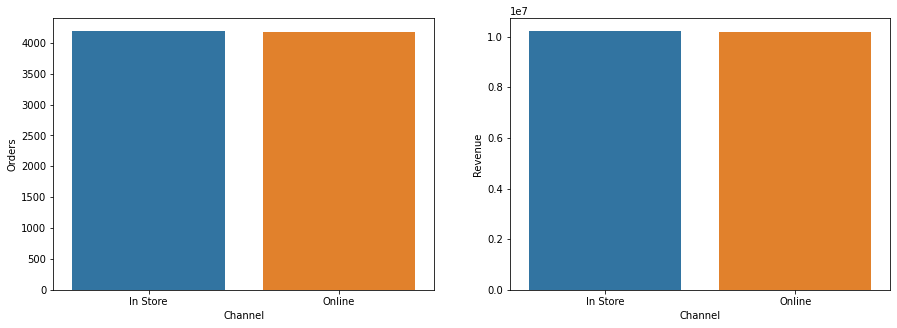

In [17]:
# Visualize channel_total
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.barplot(ax=axes[0], x = 'Channel', y = 'Orders', data = channel_total)
sns.barplot(ax=axes[1], x = 'Channel', y = 'Revenue', data = channel_total)

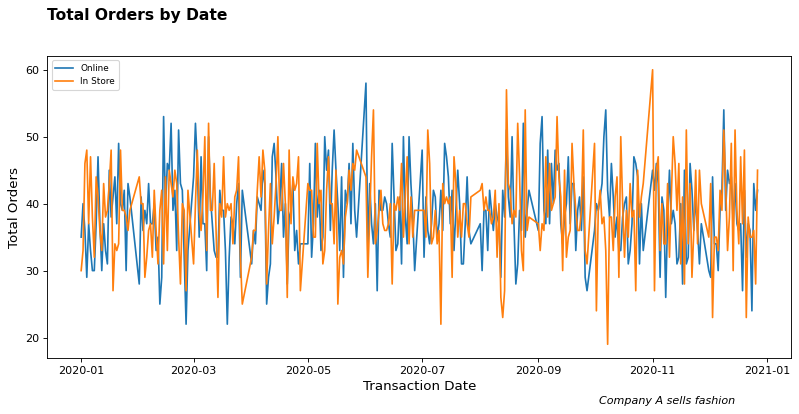

In [18]:
# Total orders by Transaction Date

plt.figure(figsize=(12,5), dpi=80)
plt.plot(Channel_amounts[Channel_amounts.Channel == 'Online'].Orders,  label = 'Online')
plt.plot(Channel_amounts[Channel_amounts.Channel == 'In Store'].Orders,  label = 'In Store')
plt.suptitle('Total Orders by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Transaction Date', size=12)
plt.ylabel('Total Orders', size=12)
plt.text(0.7, 0.01, "Company A sells fashion", style='italic',transform=plt.gcf().transFigure)
plt.legend(loc='upper left', fontsize=8)


plt.show()

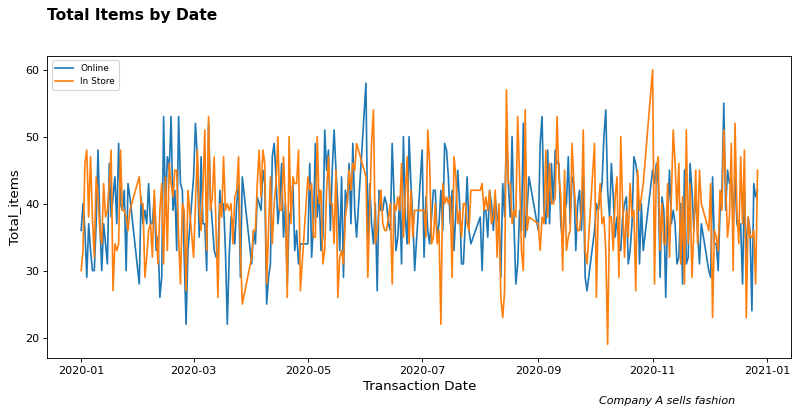

In [19]:
# Total items by Transaction Date

plt.figure(figsize=(12,5), dpi=80)
plt.plot(Channel_amounts[Channel_amounts.Channel == 'Online'].Total_items,  label = 'Online')
plt.plot(Channel_amounts[Channel_amounts.Channel == 'In Store'].Total_items,  label = 'In Store')
plt.suptitle('Total Items by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Transaction Date', size=12)
plt.ylabel('Total_items', size=12)
plt.text(0.7, 0.01, "Company A sells fashion", style='italic',transform=plt.gcf().transFigure)
plt.legend(loc='upper left', fontsize=8)


plt.show()

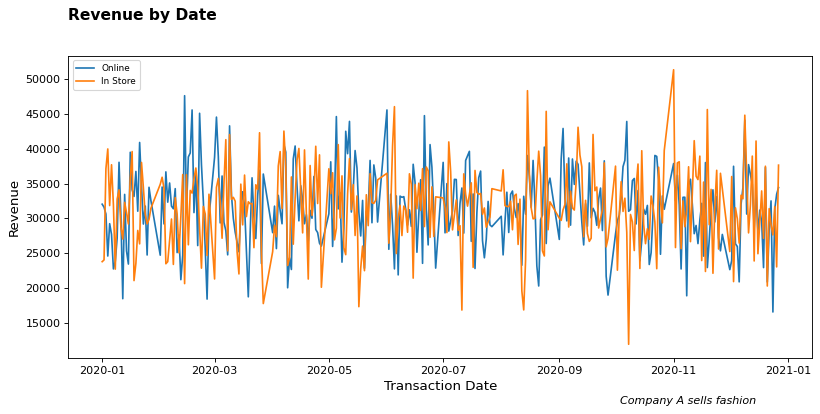

In [20]:
# Total items by Transaction Date

plt.figure(figsize=(12,5), dpi=80)
plt.plot(Channel_amounts[Channel_amounts.Channel == 'Online'].Revenue,  label = 'Online')
plt.plot(Channel_amounts[Channel_amounts.Channel == 'In Store'].Revenue,  label = 'In Store')
plt.suptitle('Revenue by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Transaction Date', size=12)
plt.ylabel('Revenue', size=12)
plt.text(0.7, 0.01, "Company A sells fashion", style='italic',transform=plt.gcf().transFigure)
plt.legend(loc='upper left', fontsize=8)


plt.show()

**Tổng kết**

---> Tổng số orders, items và revenue của 2 kênh Online và In Store có diễn biến theo thời gian tương đương nhau.




### Users, uniquePageviews, pageviews by Date


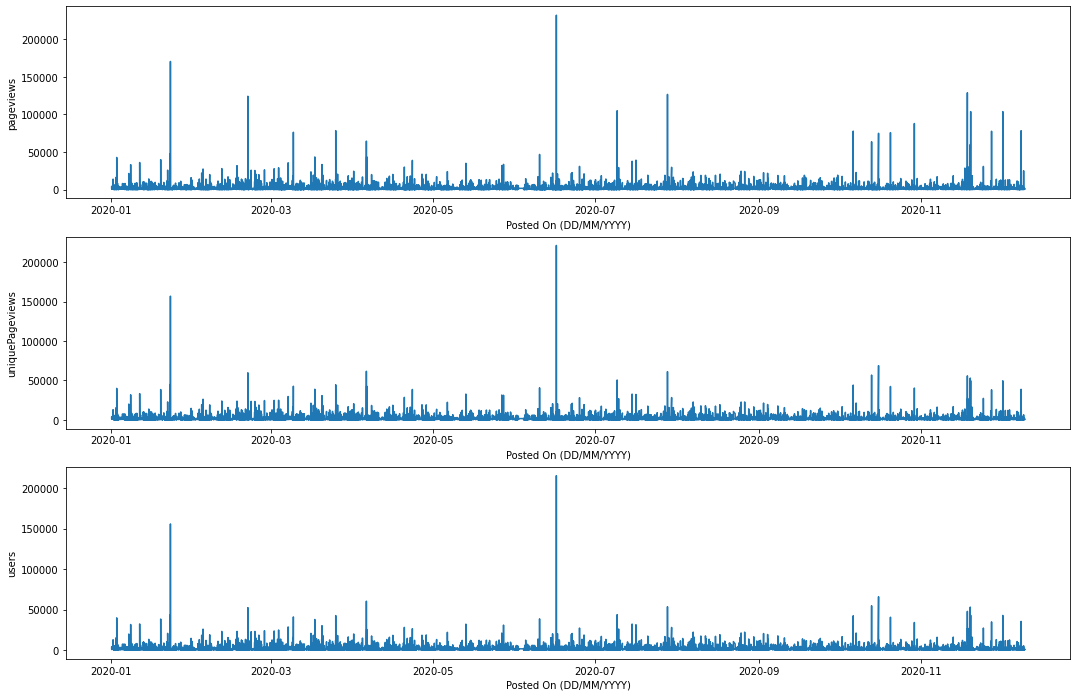

In [21]:
#Visual users, uniquePageviews, pageviews by Date
fig, axes = plt.subplots(3, 1, figsize=(18,12))
sns.set_theme(style="darkgrid")
sns.lineplot(ax=axes[0], x="Posted On (DD/MM/YYYY)", y="pageviews", data = traffics )
sns.lineplot(ax=axes[1], x="Posted On (DD/MM/YYYY)", y="uniquePageviews", data = traffics  )
sns.lineplot(ax=axes[2], x="Posted On (DD/MM/YYYY)", y="users", data = traffics  )

sns.lineplot()
plt.show()

### Total revenue vs total users, uniquePageviews, pageviews

In [22]:
traffics['Date'] = traffics['Posted On (DD/MM/YYYY)'].dt.date
traffics.head()

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY),Product,Date
0,/2020/1/vanBip-on0.100834672919284,1034.8,1048.4,1134.4,"Vag9""-Z=gN30ND@[",2020-01-01 01:03:02,vanBip-on0.100834672919284,2020-01-01
1,/2020/1/fujBdence0.385183712192661,4097.8,4142.6,4457.2,ToOYo&o|?(;MH>V:,2020-01-01 01:46:40,fujBdence0.385183712192661,2020-01-01
2,/2020/1/baiXpsule0.236876019278184,642.6,653.8,726.8,PaasB'\_LlDEk`=W,2020-01-01 02:55:07,baiXpsule0.236876019278184,2020-01-01
3,/2020/1/artjriner0.183950395687591,3413.0,3469.6,3795.6,Ro7|R40![FY$PS`<,2020-01-01 04:18:00,artjriner0.183950395687591,2020-01-01
4,/2020/1/appMn-usd0.284138838758011,1447.0,1465.6,1562.6,MiUNo1$pZkrlcw>M,2020-01-01 04:35:14,appMn-usd0.284138838758011,2020-01-01


In [23]:
# total revenue by date
revenue = data.groupby(["TransactionDate"], as_index=False)\
                        ["SellPrice"]\
                        .agg([np.sum]).reset_index().rename(columns={'sum':'Revenue'})
revenue


,TransactionDate,Revenue
0,2020-01-01,55864
1,2020-01-02,55681
2,2020-01-03,67753
3,2020-01-04,64573
4,2020-01-05,61098
...,...,...
319,2020-12-23,61634
320,2020-12-24,44266
321,2020-12-25,63062
322,2020-12-26,56545


In [24]:
# users, uniquePageviews, users by Date
summarize_traffic  = traffics.groupby(["Date"]).\
                            agg(users = ('users','sum'), uniquePageviews = ('uniquePageviews','sum'), \
                            pageviews = ('pageviews','sum')).reset_index()  
summarize_traffic

,Date,users,uniquePageviews,pageviews
0,2020-01-01,63755.4,64814.8,70353.6
1,2020-01-02,111861.4,113640.0,122557.8
2,2020-01-03,63749.8,65175.4,71058.0
3,2020-01-04,13946.0,14274.6,15349.6
4,2020-01-05,47065.0,47856.6,51438.2
...,...,...,...,...
338,2020-12-05,23906.0,24678.8,27024.6
339,2020-12-06,25892.8,26517.0,28433.4
340,2020-12-07,95081.8,97565.0,105456.0
341,2020-12-08,100577.0,105419.6,150902.2


In [25]:
#Chuyển thành date thành dạng datetime
summarize_traffic['Date'] = pd.to_datetime(summarize_traffic['Date'])

In [26]:
# merge summarize_traffic and revenue table

revenue['TransactionDate'] = revenue['TransactionDate'].astype('datetime64[ns]')
#revenue.TransactionDate = pd.to_datetime(revenue['TransactionDate']).dt.date

traffic_rev = summarize_traffic.merge(revenue, left_on= 'Date', right_on='TransactionDate')
traffic_rev

,Date,users,uniquePageviews,pageviews,TransactionDate,Revenue
0,2020-01-01,63755.4,64814.8,70353.6,2020-01-01,55864
1,2020-01-02,111861.4,113640.0,122557.8,2020-01-02,55681
2,2020-01-03,63749.8,65175.4,71058.0,2020-01-03,67753
3,2020-01-04,13946.0,14274.6,15349.6,2020-01-04,64573
4,2020-01-05,47065.0,47856.6,51438.2,2020-01-05,61098
...,...,...,...,...,...,...
300,2020-12-05,23906.0,24678.8,27024.6,2020-12-05,55953
301,2020-12-06,25892.8,26517.0,28433.4,2020-12-06,47406
302,2020-12-07,95081.8,97565.0,105456.0,2020-12-07,65365
303,2020-12-08,100577.0,105419.6,150902.2,2020-12-08,67222


In [27]:
traffic_rev = traffic_rev.drop('TransactionDate', axis=1)
traffic_rev

,Date,users,uniquePageviews,pageviews,Revenue
0,2020-01-01,63755.4,64814.8,70353.6,55864
1,2020-01-02,111861.4,113640.0,122557.8,55681
2,2020-01-03,63749.8,65175.4,71058.0,67753
3,2020-01-04,13946.0,14274.6,15349.6,64573
4,2020-01-05,47065.0,47856.6,51438.2,61098
...,...,...,...,...,...
300,2020-12-05,23906.0,24678.8,27024.6,55953
301,2020-12-06,25892.8,26517.0,28433.4,47406
302,2020-12-07,95081.8,97565.0,105456.0,65365
303,2020-12-08,100577.0,105419.6,150902.2,67222


In [28]:
# Đổi tên
traffic_rev.rename(columns = {'Date':'TransactionDate'}, inplace = True)
traffic_rev

,TransactionDate,users,uniquePageviews,pageviews,Revenue
0,2020-01-01,63755.4,64814.8,70353.6,55864
1,2020-01-02,111861.4,113640.0,122557.8,55681
2,2020-01-03,63749.8,65175.4,71058.0,67753
3,2020-01-04,13946.0,14274.6,15349.6,64573
4,2020-01-05,47065.0,47856.6,51438.2,61098
...,...,...,...,...,...
300,2020-12-05,23906.0,24678.8,27024.6,55953
301,2020-12-06,25892.8,26517.0,28433.4,47406
302,2020-12-07,95081.8,97565.0,105456.0,65365
303,2020-12-08,100577.0,105419.6,150902.2,67222


In [29]:
#tính tương quan giữa các biến numberic trong data
traffic_rev_corr = traffic_rev.corr()
traffic_rev_corr

,users,uniquePageviews,pageviews,Revenue
users,1.000000,0.999364,0.978222,0.076276
uniquePageviews,0.999364,1.000000,0.981307,0.075581
pageviews,0.978222,0.981307,1.000000,0.075464
Revenue,0.076276,0.075581,0.075464,1.000000


In [30]:
#ones_like build a matrix of booleans with out data
ones_corr = np.ones_like(traffic_rev_corr, dtype=bool)
ones_corr

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [31]:
# xem shape của 2 bảng data
ones_corr.shape, traffic_rev_corr.shape

((4, 4), (4, 4))

In [32]:
# np's triu: hàm lấy 1 nửa tam giác của ma trận trên
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

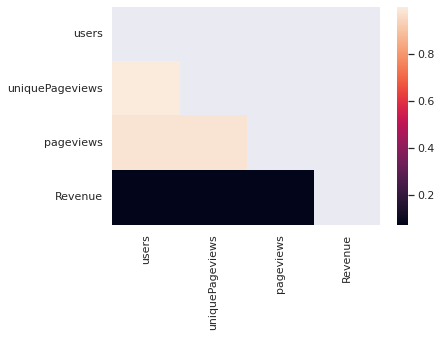

In [33]:
# vẽ heatmap
sns.heatmap(data=traffic_rev_corr, mask=mask)

In [34]:
# Bỏ các cột user và nr.employed để visual đẹp hơn
adjust_mask = mask[1:, :-1]
adjust_traffic_rev_corr = traffic_rev_corr.iloc[1: ,:-1]

Text(0.0, 1.0, 'CORRELATION MATRIX\nWEBSITE TRAFFIC FEATURES COMPOSITION\n')

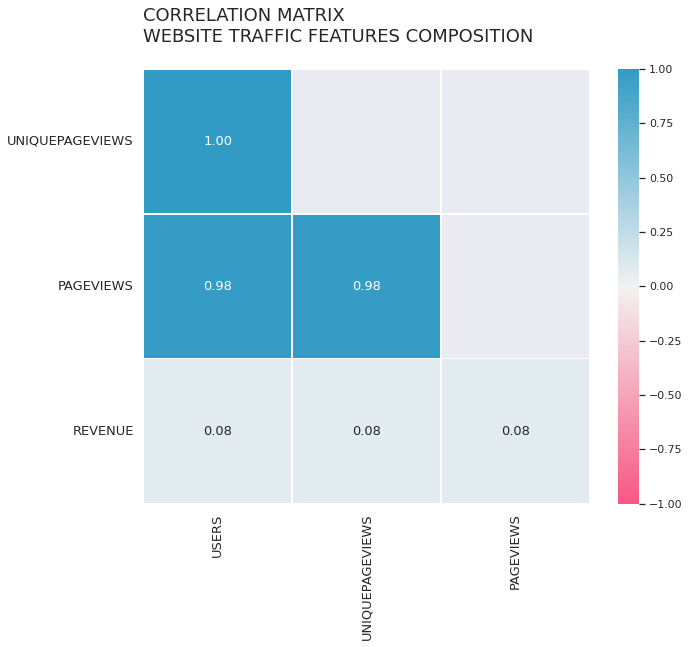

In [35]:
fig, ax = plt.subplots(figsize=(10,8))

#tạo bảng màu HUSL (Hsluv.org)
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True) 

sns.heatmap(data=adjust_traffic_rev_corr, mask=adjust_mask,
           annot=True, annot_kws={"fontsize":13}, fmt=".2f", cmap =cmap,
           vmin=-1, vmax=1,
           linecolor='white',linewidths=0.5);

yticks = [i.upper() for i in adjust_traffic_rev_corr.index]
xticks = [i.upper() for i in adjust_traffic_rev_corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13);
ax.set_xticklabels(xticks, rotation=90, fontsize=13);

title = 'CORRELATION MATRIX\nWEBSITE TRAFFIC FEATURES COMPOSITION\n'
ax.set_title(title, loc='left',fontsize=18)
#plt.savefig('ccorrr.svg') 

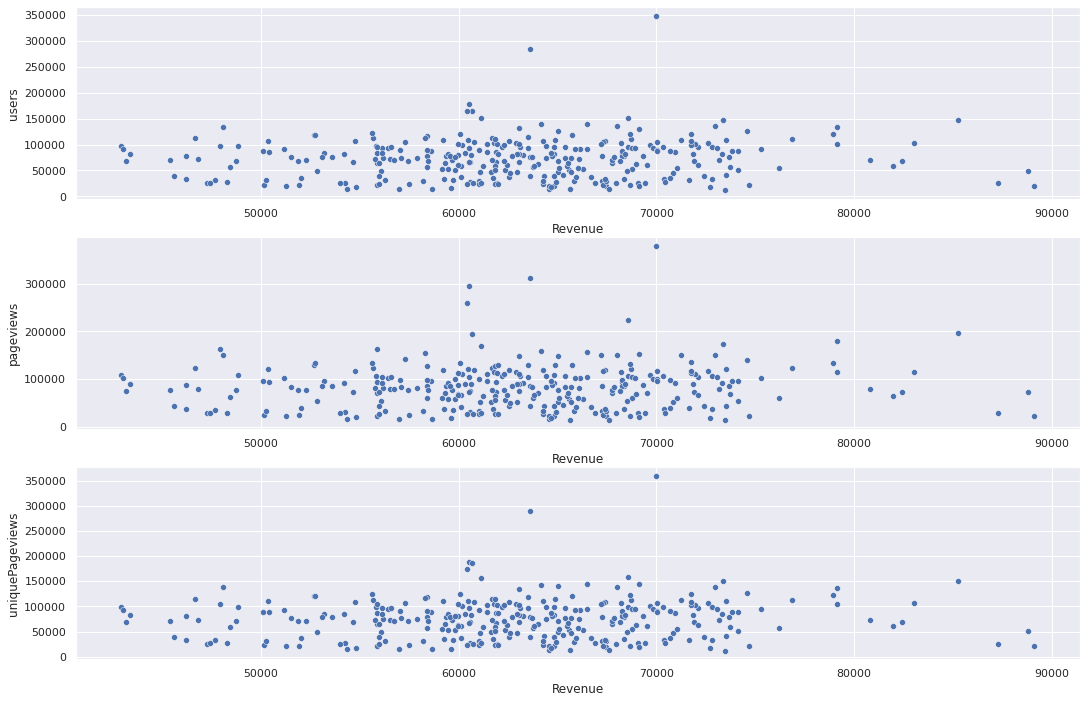

In [36]:
#Biểu đồ phân tán của 3 biến tương ứng ảnh hưởng đến Revenue
fig, axes = plt.subplots(3, 1, figsize=(18,12))
sns.set_theme(style="darkgrid")
sns.scatterplot(ax=axes[0], x="Revenue", y="users", data = traffic_rev ) 
sns.scatterplot(ax=axes[1], x="Revenue", y="pageviews", data = traffic_rev ) 
sns.scatterplot(ax=axes[2], x="Revenue", y="uniquePageviews", data = traffic_rev ) 

sns.lineplot()
plt.show()

In [37]:
#Import lib tính p-value
from scipy import stats

### P-value

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when: 

- the p-value is  0.001: we say there is strong evidence that the correlation is significant.
- the p-value is  0.05: there is moderate evidence that the correlation is significant.
- the p-value is  0.1: there is weak evidence that the correlation is significant.
- the p-value is  0.1: there is no evidence that the correlation is significant.

In [38]:
# Mối quan hệ giữa Revenue và user
pearson_coef, p_value = stats.pearsonr(traffic_rev['Revenue'], traffic_rev['users'])
print("Correlation Coefficient is", pearson_coef.round(3))
print("Values P-value is ", p_value.round(3))

Correlation Coefficient is 0.076
Values P-value is  0.184


In [39]:
# Mối quan hệ giữa Revenue và pageviews
pearson_coef, p_value = stats.pearsonr(traffic_rev['Revenue'], traffic_rev['pageviews'])
print("Correlation Coefficient is", pearson_coef.round(3))
print("Values P-value is ", p_value.round(3))

Correlation Coefficient is 0.075
Values P-value is  0.189


In [40]:
# Mối quan hệ giữa Revenue và uniquePageviews
pearson_coef, p_value = stats.pearsonr(traffic_rev['Revenue'], traffic_rev['uniquePageviews'])
print("Correlation Coefficient is", pearson_coef.round(3))
print("Values P-value is ", p_value.round(3))

Correlation Coefficient is 0.076
Values P-value is  0.188


**Nhận xét:**
Qua các biểu đồ trên và chỉ số P-value ta có thể thấy các Website traffic không ảnh hưởng đến doanh thu của Company A do có sự tương quan thấp

<h2><font color = 'orange'> Which products get us pageviews and revenue? <font></h2>


In [41]:
data.head()

,OrderID,CustomerID,ItemID,TransactionDate,Channel,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter,Product,Brand,SellPrice,CostPrice
0,0,0,352,2020-03-21,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735,426
1,637,57,352,2020-03-15,In Store,Var0.0876970591979241,Bhan0.0592432181453122,GER - Germany,2016-02-02,F,1966-01-14,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735,426
2,0,0,3433,2020-07-14,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491
3,1840,167,3433,2020-05-16,In Store,Y0.694526245425698,Pur0.889218979929135,UK - United Kingdom,2015-04-16,M,1972-03-23,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491
4,3386,307,3433,2020-04-23,In Store,Moh0.478682882191102,Khair0.475794987205303,FR - France,2016-06-02,NaN,1989-05-04,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491


In [42]:
#Tạo bảng tổng hợp doanh thu sản phẩm 
item_revenue = data.groupby(['Brand', 'Product']).agg(TotalRevenue = ('SellPrice','sum'), TotalOrder = ('OrderID', 'count'), \
                                              TotalCustomers = ('CustomerID', 'count')).reset_index()

In [43]:
#Lọc bảng 
item_revenue.sort_values('TotalRevenue', ascending = False)

,Brand,Product,TotalRevenue,TotalOrder,TotalCustomers
4885,Il^(xPdB:S`#irqz,hypsrview0.321288570724117,11556,9,9
9876,"Relp\+KJ?D,cWw0P",reeelease0.452821711209563,9205,7,7
306,"Ac8IJsKH,4xtY.Tk",audE-info0.884915261087885,8428,7,7
3195,DiCo4(99zZ<nkafj,kinv-news0.29905739542661,7980,6,6
12575,YMbpE$ev3qMx-h*E,ymc_orson0.319251813809483,7794,6,6
...,...,...,...,...,...
1959,Bedz04LN6g4NY{R5,2g-aation0.859210237517232,72,1,1
2242,Br0Aza@`0k<LPOVi,g-hxrowns0.35584537222102,69,1,1
6090,Levk)A7u]J|c_tFD,legX-info0.422268138697415,63,1,1
6352,Lo:}7^:YFSc4xYIs,umaZction0.0701712715774042,60,1,1


In [44]:
# thống kê 
item_revenue.describe()

,TotalRevenue,TotalOrder,TotalCustomers
count,13542.000000,13542.000000,13542.000000
mean,1507.695909,1.861837,1.861837
std,1096.691381,1.005725,1.005725
min,46.000000,1.000000,1.000000
25%,742.000000,1.000000,1.000000
50%,1186.000000,2.000000,2.000000
75%,2042.750000,2.000000,2.000000
max,11556.000000,9.000000,9.000000


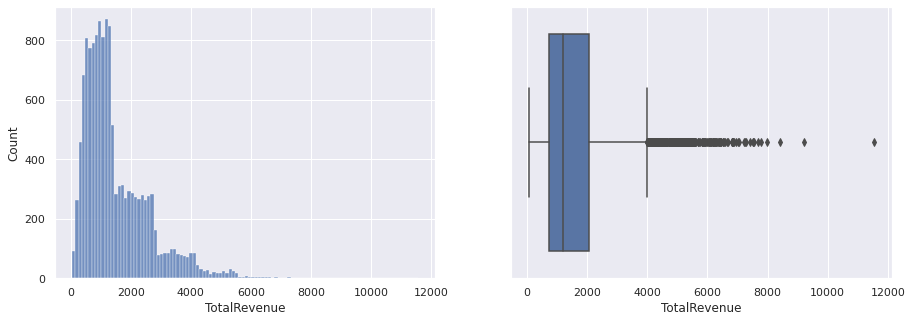

In [45]:
# Sự phân bố của TotalRevenue
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(ax=axes[0], x = 'TotalRevenue', data = item_revenue)
sns.boxplot(ax=axes[1], x = 'TotalRevenue', data = item_revenue)

In [46]:
# Xếp loại revenue dựa trên sản phẩm theo theo phân bố của data Q1, Q2, Q3 (25%,50%,75%)
conditions = [(item_revenue['TotalRevenue'] < 742), \
            (item_revenue['TotalRevenue'] >= 742) & (item_revenue['TotalRevenue'] < 1186), \
            (item_revenue['TotalRevenue'] >= 1186) & (item_revenue['TotalRevenue'] < 2042), \
            (item_revenue['TotalRevenue'] >= 2042)]

values = ['Low', 'Medium', 'High', 'Very High']

item_revenue['ranking'] = np.select(conditions, values)

#### Top 10 sản phẩm có revenue cao nhất

In [47]:
# Top 10 sản phẩm có revenue cao nhất
item_revenue_product_10  = item_revenue[item_revenue['ranking'] == 'Very High'].sort_values('TotalRevenue', ascending = False).head(10)

item_revenue_product_10 

,Brand,Product,TotalRevenue,TotalOrder,TotalCustomers,ranking
4885,Il^(xPdB:S`#irqz,hypsrview0.321288570724117,11556,9,9,Very High
9876,"Relp\+KJ?D,cWw0P",reeelease0.452821711209563,9205,7,7,Very High
306,"Ac8IJsKH,4xtY.Tk",audE-info0.884915261087885,8428,7,7,Very High
3195,DiCo4(99zZ<nkafj,kinv-news0.29905739542661,7980,6,6,Very High
12575,YMbpE$ev3qMx-h*E,ymc_orson0.319251813809483,7794,6,6,Very High
1693,"BMh._Fx~""+dbZy|,",bmwk-20210.31690704020655,7686,6,6,Very High
1407,Ap8r`F[}sfP_x007f_->SZ,ubeYanada0.100113795307302,7552,4,4,Very High
13152,go@c<p.bPWb1nLrF,titM-info0.550757203954225,7520,5,5,Very High
10155,Sa?9zXUH5iJbuE'S,samLement0.78565851365938,7518,6,6,Very High
3231,DiL%1<G?YSFM_/TR,dioa-info0.750756927974235,7422,6,6,Very High


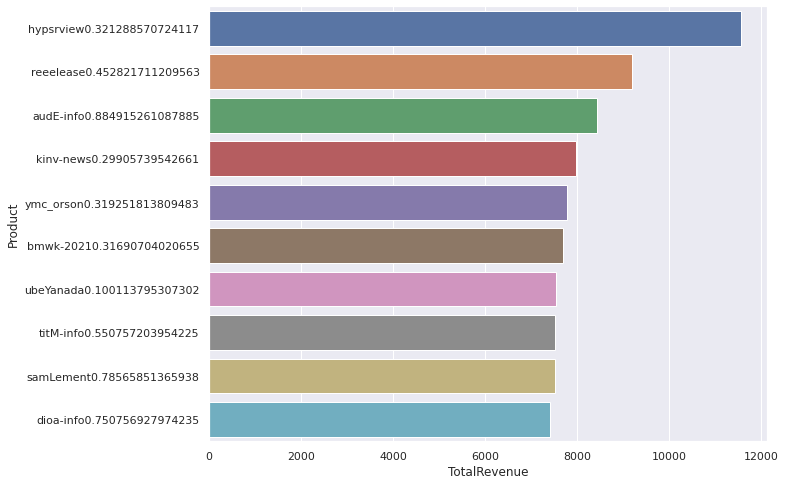

In [48]:
# Top 10 sản phẩm có revenue cao nhất
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y = 'Product',
            x = 'TotalRevenue',
            data = item_revenue_product_10)
plt.show()

In [49]:
traffics.head()

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY),Product,Date
0,/2020/1/vanBip-on0.100834672919284,1034.8,1048.4,1134.4,"Vag9""-Z=gN30ND@[",2020-01-01 01:03:02,vanBip-on0.100834672919284,2020-01-01
1,/2020/1/fujBdence0.385183712192661,4097.8,4142.6,4457.2,ToOYo&o|?(;MH>V:,2020-01-01 01:46:40,fujBdence0.385183712192661,2020-01-01
2,/2020/1/baiXpsule0.236876019278184,642.6,653.8,726.8,PaasB'\_LlDEk`=W,2020-01-01 02:55:07,baiXpsule0.236876019278184,2020-01-01
3,/2020/1/artjriner0.183950395687591,3413.0,3469.6,3795.6,Ro7|R40![FY$PS`<,2020-01-01 04:18:00,artjriner0.183950395687591,2020-01-01
4,/2020/1/appMn-usd0.284138838758011,1447.0,1465.6,1562.6,MiUNo1$pZkrlcw>M,2020-01-01 04:35:14,appMn-usd0.284138838758011,2020-01-01


In [50]:
  traffics_product = traffics.groupby(['Date', 'Product', 'Brand']).agg(users = ('users','sum'), \
                                                                    uniquePageviews = ('uniquePageviews', 'sum'), \
                                                                    pageviews = ('pageviews', 'sum')).reset_index()

In [51]:
traffics_product

,Date,Product,Brand,users,uniquePageviews,pageviews
0,2020-01-01,101Dlease0.745305177696334,SSJ%#@$7LTf<p'Jx,285.4,286.6,305.6
1,2020-01-01,a-qXailer0.39660536369098,"MouDd/fn,XEARhBp",3450.4,3497.6,3705.8
2,2020-01-01,appMn-usd0.284138838758011,MiUNo1$pZkrlcw>M,1447.0,1465.6,1562.6
3,2020-01-01,artjriner0.183950395687591,Ro7|R40![FY$PS`<,3413.0,3469.6,3795.6
4,2020-01-01,baiXpsule0.236876019278184,PaasB'\_LlDEk`=W,642.6,653.8,726.8
...,...,...,...,...,...,...
17884,2020-12-09,twiO-word0.109741844099603,Mc&v?E*9%}~WP@rD,813.2,831.6,889.8
17885,2020-12-09,tygboraww0.0915621394874353,Ty'/0_5dc?P9JKLf,1339.0,1353.8,1457.6
17886,2020-12-09,vanAction0.315573410341238,"Vag9""-Z=gN30ND@[",309.2,309.6,330.4
17887,2020-12-09,vanMtists0.0499183505700914,"Vag9""-Z=gN30ND@[",5248.2,6364.2,25109.6


In [52]:
# Thống kê 
traffics_product.describe()

,users,uniquePageviews,pageviews
count,17889.000000,17889.000000,17889.000000
mean,1395.496048,1434.260596,1592.936453
std,3352.450235,3490.933361,4412.133767
min,0.200000,0.200000,0.400000
25%,329.000000,334.800000,358.800000
50%,624.000000,635.800000,683.600000
75%,1351.400000,1387.200000,1499.800000
max,215222.600000,221108.400000,232177.000000


In [53]:
# Xếp loại các mức pageviews của sản phẩm dựa theo Q1, Q2, Q3
condition = [(traffics_product['pageviews'] < 358), \
            (traffics_product['pageviews'] >= 358) & (traffics_product['pageviews'] < 683), \
            (traffics_product['pageviews'] >= 683) & (traffics_product['pageviews'] < 1499), \
            (traffics_product['pageviews'] >= 1499)]

value = ['Low', 'Medium', 'High', 'Popular']

traffics_product['traffic rank'] = np.select(condition, value)

In [54]:
# Top 10 sản phẩm có traffic cao nhất
traffics_product_10 = traffics_product[traffics_product['traffic rank'] == 'Popular'].sort_values('pageviews', ascending = False).head(10)
traffics_product_10

,Date,Product,Brand,users,uniquePageviews,pageviews,traffic rank
9045,2020-06-16,sonEies-x0.139039192479287,So)zm5Pl^_G5t?q,215222.6,221108.4,232177.0,Popular
1242,2020-01-23,porQlease0.507911745358356,"Ac8IJsKH,4xtY.Tk",155640.0,156789.4,170599.0,Popular
16913,2020-11-18,pumMvideo0.837931992780922,PU]vXmX9fgf$xf!/,47779.6,55759.2,128891.8,Popular
11316,2020-07-28,besfeek-50.280274313298435,BajeQM&IzKX.a8&_,53508.2,61120.4,126771.0,Popular
2739,2020-02-21,rogLrecap0.644396392507623,LaX{ty9j_zZdD-\`,52381.2,59658.8,124284.2,Popular
10334,2020-07-09,jefXaunch0.410067394635876,Stc\9>Cqq;Rn&/|F,43667.4,50536.2,104984.2,Popular
17434,2020-12-01,chrL-york0.372865344640649,"Ch6hNzXa,'=Q=)Wi",42787.8,49496.4,103863.4,Popular
16990,2020-11-19,wradaunch0.370927222684073,Wrv1Qv~}Dk7@']x3,42977.6,49637.6,103850.0,Popular
15994,2020-10-29,angztered0.926486710136623,An1a]{mE?nl\sM%&,34073.4,40323.6,87999.6,Popular
4494,2020-03-25,goa]akers0.899516668943853,Ai/cV(XG>`JN2Ln,42587.8,44467.0,78523.6,Popular


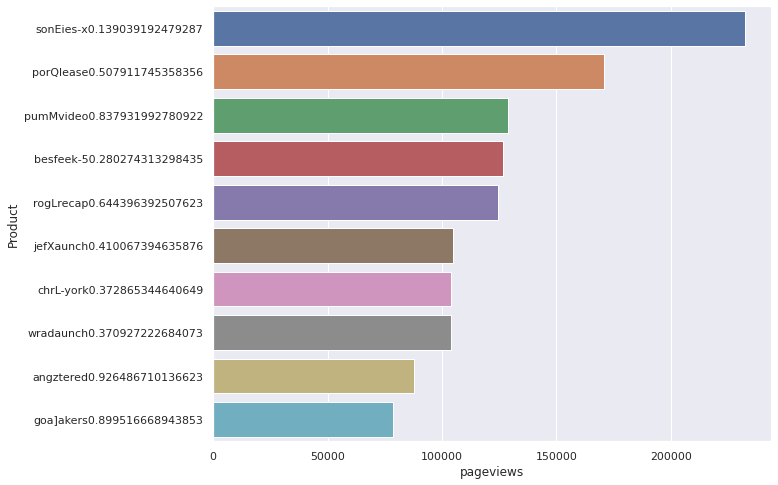

In [55]:
# Top 10 sản phẩm có traffic cao nhất
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y = 'Product',
            x = 'pageviews',
            data = traffics_product_10)
plt.show()

In [56]:
# Sắp xếp thứ tự giảm dần các sản phẩm có nhiều traffic
traff_rev = traffics_product.merge(item_revenue, left_on = ['Product', 'Brand'], right_on = ['Product', 'Brand'])
traff_rev.sort_values(['pageviews', 'TotalRevenue'], ascending = False)

,Date,Product,Brand,users,uniquePageviews,pageviews,traffic rank,TotalRevenue,TotalOrder,TotalCustomers,ranking
961,2020-01-23,porQlease0.507911745358356,"Ac8IJsKH,4xtY.Tk",155640.0,156789.4,170599.0,Popular,2714,2,2,Very High
11624,2020-11-18,pumMvideo0.837931992780922,PU]vXmX9fgf$xf!/,47779.6,55759.2,128891.8,Popular,3960,3,3,Very High
7883,2020-07-28,besfeek-50.280274313298435,BajeQM&IzKX.a8&_,53508.2,61120.4,126771.0,Popular,2748,2,2,Very High
2002,2020-02-21,rogLrecap0.644396392507623,LaX{ty9j_zZdD-\`,52381.2,59658.8,124284.2,Popular,1197,1,1,High
7194,2020-07-09,jefXaunch0.410067394635876,Stc\9>Cqq;Rn&/|F,43667.4,50536.2,104984.2,Popular,484,1,1,Low
...,...,...,...,...,...,...,...,...,...,...,...
3564,2020-04-02,yunsement0.44148099082229,Yu%jaXeE/8L$d$yX,0.2,0.2,0.6,Low,1128,1,1,Medium
4643,2020-04-30,recPeator0.470956776867346,OlDe}#G)yIt'+Bc3,0.2,0.2,0.4,Low,3340,4,4,Very High
4605,2020-04-29,tisetream0.262717438134904,Tir72~+xaqy!(G\-,0.4,0.4,0.4,Low,901,1,1,Medium
8258,2020-08-07,bobK-news0.573637665518942,"Ac8IJsKH,4xtY.Tk",0.2,0.2,0.4,Low,870,1,1,Medium


In [57]:
# Sắp xếp thứ tự giảm dần các sản phẩm có nhiều revenue
traff_rev.sort_values(['TotalRevenue', 'pageviews'], ascending = False)

,Date,Product,Brand,users,uniquePageviews,pageviews,traffic rank,TotalRevenue,TotalOrder,TotalCustomers,ranking
2830,2020-03-16,hypsrview0.321288570724117,Il^(xPdB:S`#irqz,524.2,539.8,587.0,Medium,11556,9,9,Very High
2147,2020-02-26,reeelease0.452821711209563,"Relp\+KJ?D,cWw0P",257.8,259.2,281.8,Low,9205,7,7,Very High
624,2020-01-16,audE-info0.884915261087885,"Ac8IJsKH,4xtY.Tk",1086.4,1110.8,1205.6,High,8428,7,7,Very High
6390,2020-06-17,kinv-news0.29905739542661,DiCo4(99zZ<nkafj,673.8,694.8,766.4,High,7980,6,6,Very High
9385,2020-09-10,ymc_orson0.319251813809483,YMbpE$ev3qMx-h*E,198.4,203.2,223.2,Low,7794,6,6,Very High
...,...,...,...,...,...,...,...,...,...,...,...
10684,2020-10-20,2g-aation0.859210237517232,Bedz04LN6g4NY{R5,254.8,257.0,277.8,Low,72,1,1,Low
3135,2020-03-24,g-hxrowns0.35584537222102,Br0Aza@`0k<LPOVi,2808.0,2831.6,3287.8,Popular,69,1,1,Low
11279,2020-11-08,legX-info0.422268138697415,Levk)A7u]J|c_tFD,1258.2,1275.2,1386.6,High,63,1,1,Low
3115,2020-03-23,umaZction0.0701712715774042,Lo:}7^:YFSc4xYIs,446.8,453.4,512.8,Medium,60,1,1,Low


**Nhận xét:** Những sản phẩm có revenue cao nhất thì lượng traffic không quá cao.

In [58]:
# Lấy ra các cột cần tính toán
traff_rev = traff_rev[['Product', 'Brand', 'pageviews', 'TotalRevenue', 'traffic rank', 'ranking']]
traff_rev

,Product,Brand,pageviews,TotalRevenue,traffic rank,ranking
0,101Dlease0.745305177696334,SSJ%#@$7LTf<p'Jx,305.6,465,Low,Low
1,a-qXailer0.39660536369098,"MouDd/fn,XEARhBp",3705.8,444,Popular,Low
2,baiXpsule0.236876019278184,PaasB'\_LlDEk`=W,726.8,3540,High,Very High
3,blopvideo0.67317091233294,VipZx1>S^s?}%X(},38.0,1800,Low,High
4,fujBdence0.385183712192661,ToOYo&o|?(;MH>V:,4457.2,1689,Popular,High
...,...,...,...,...,...,...
12365,trobhotos0.430881773750675,"Jo?$J}r__x007f_""0#/!m:",4030.2,3699,Popular,Very High
12366,twiO-word0.109741844099603,Mc&v?E*9%}~WP@rD,889.8,1536,High,High
12367,vanAction0.315573410341238,"Vag9""-Z=gN30ND@[",330.4,1162,Low,Medium
12368,vanMtists0.0499183505700914,"Vag9""-Z=gN30ND@[",25109.6,1208,Popular,High


In [59]:
# tổng hợp ranking và traffic rank theo brand
pd.DataFrame(traff_rev.groupby(['ranking', 'traffic rank'])['Brand'].count())


Brand
ranking   traffic rank       
High      High            769
          Low             764
          Medium          772
          Popular         809
Low       High            785
          Low             784
          Medium          750
          Popular         742
Medium    High            785
          Low             747
          Medium          803
          Popular         757
Very High High            766
          Low             795
          Medium          794
          Popular         748

In [60]:
# Top 5 sản phẩm vừa có traffic cao vừa có revenue cao
traff_rev[(traff_rev['ranking'] == 'Very High') & (traff_rev['traffic rank'] == 'Popular')].sort_values(['TotalRevenue', 'pageviews'], ascending = False).head(5)


,Product,Brand,pageviews,TotalRevenue,traffic rank,ranking
9714,samLement0.78565851365938,Sa?9zXUH5iJbuE'S,1590.0,7518,Popular,Very High
6946,takgeveal0.557457939403364,Ka>n{\}.q.~P&*Ao,8596.2,7049,Popular,Very High
3404,stupponyo0.211329698054268,"MouDd/fn,XEARhBp",7190.6,6954,Popular,Very High
11,poryn-9920.309751616966229,"PoAqnL=>P9Qb""ZUa",10795.6,6815,Popular,Very High
11075,bbcF-date0.977769785530841,"Relp\+KJ?D,cWw0P",2049.6,6815,Popular,Very High


In [61]:
# Top 5 sản phẩm vừa có traffic Low nhưng có revenue cao
traff_rev[(traff_rev['ranking'] == 'Very High') & (traff_rev['traffic rank'] == 'Low')].sort_values(['TotalRevenue', 'pageviews'], ascending = False).head(5)

,Product,Brand,pageviews,TotalRevenue,traffic rank,ranking
2147,reeelease0.452821711209563,"Relp\+KJ?D,cWw0P",281.8,9205,Low,Very High
9385,ymc_orson0.319251813809483,YMbpE$ev3qMx-h*E,223.2,7794,Low,Very High
9535,ausDition0.316805159126848,Exa~e4sZi*|fpD<^,161.4,7232,Low,Very High
4985,theftream0.650769488105747,Mi+QB'FqF;cGT)Y',350.2,7000,Low,Very High
8121,raejement0.618482160856154,Ra&3X!d15ID^=sus,342.4,6860,Low,Very High


In [62]:
# Top 5 sản phẩm vừa có traffic cao nhưng có revenue thấp
traff_rev[(traff_rev['ranking'] == 'Low') & (traff_rev['traffic rank'] == 'Popular')].sort_values(['TotalRevenue', 'pageviews'], ascending = False).head(5)

,Product,Brand,pageviews,TotalRevenue,traffic rank,ranking
8206,chaPtopia0.305759133071658,Tr1)L/A]=of['Qhn,1906.0,741,Popular,Low
4933,whil-info0.511259246630254,ad(;%f6iD'}9EHD[,1737.6,741,Popular,Low
9727,youTcture0.944314892191284,Ap!FulqmT[82a2/E,3566.4,740,Popular,Low
1874,niku5-3000.815662316070307,NiPea$n|Eu@<@>'L,2231.6,740,Popular,Low
3592,nik\-info0.17636213285294,NiPea$n|Eu@<@>'L,2175.4,740,Popular,Low


<h2><font color = 'orange'> What customer segments are there? <font></h2>

In [63]:
data.head()

,OrderID,CustomerID,ItemID,TransactionDate,Channel,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter,Product,Brand,SellPrice,CostPrice
0,0,0,352,2020-03-21,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735,426
1,637,57,352,2020-03-15,In Store,Var0.0876970591979241,Bhan0.0592432181453122,GER - Germany,2016-02-02,F,1966-01-14,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735,426
2,0,0,3433,2020-07-14,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491
3,1840,167,3433,2020-05-16,In Store,Y0.694526245425698,Pur0.889218979929135,UK - United Kingdom,2015-04-16,M,1972-03-23,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491
4,3386,307,3433,2020-04-23,In Store,Moh0.478682882191102,Khair0.475794987205303,FR - France,2016-06-02,NaN,1989-05-04,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491


In [64]:
customer_data = data.groupby(["CustomerID","FirstName", "LastName","Country","Birthday","DateJoined","Newsletter"]).\
                            agg(total_expenditures = ('SellPrice','sum')).\
                            reset_index()
customer_data.head()

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,total_expenditures
0,0,V0.296680287495188,L0.104646531512644,FR - France,1968-02-03,2015-12-18,N,32997
1,1,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,34948
2,2,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,17879
3,3,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,14603
4,4,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,37029


In [65]:
import datetime
today = datetime.date.today()

# Tính tuổi khách hàng
customer_data['Age'] = range(len(customer_data['Birthday']))
for i in range(len(customer_data['Birthday'])):
    customer_data['Age'][i] = today.year - customer_data['Birthday'][i].year

# tính số năm tham gia member
customer_data['Loyalty'] = range(len(customer_data['DateJoined']))
for i in range(len(customer_data['DateJoined'])):
    customer_data['Loyalty'][i] = today.year - customer_data['DateJoined'][i].year

In [66]:
customer_data.head()

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,total_expenditures,Age,Loyalty
0,0,V0.296680287495188,L0.104646531512644,FR - France,1968-02-03,2015-12-18,N,32997,54,7
1,1,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,34948,13,7
2,2,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,17879,32,7
3,3,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,14603,48,7
4,4,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,37029,41,7


In [67]:
#merge với bảng customer
customer_seg = customer_data.merge(customer_info[['ID','Gender']],how='inner',left_on='CustomerID', right_on='ID')
customer_seg.drop('ID', inplace=True, axis=1) # bỏ 1 cột id
customer_seg.head()


,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,total_expenditures,Age,Loyalty,Gender
0,0,V0.296680287495188,L0.104646531512644,FR - France,1968-02-03,2015-12-18,N,32997,54,7,NaN
1,1,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,34948,13,7,M
2,2,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,17879,32,7,F
3,3,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,14603,48,7,M
4,4,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,37029,41,7,M


### EDA: Exploratory Data Analysis

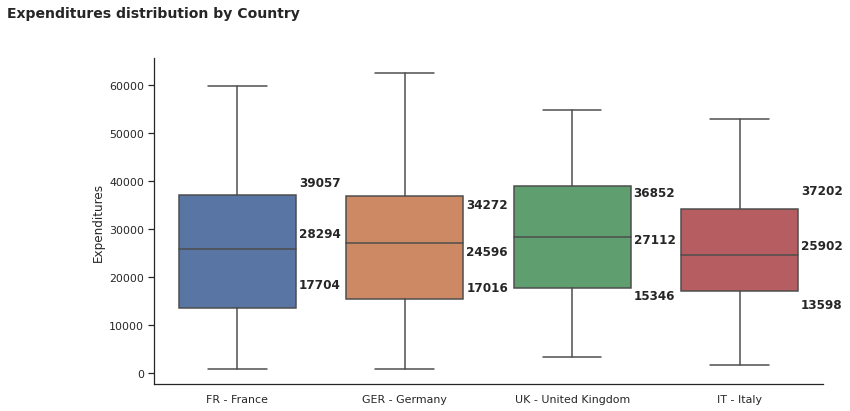

In [68]:
sns.set(rc={'figure.figsize':(12, 6)})
sns.set_style("white")

# tính toán các chỉ số median, q1, q3, min, max để trên chart
median_list = customer_seg.groupby('Country')['total_expenditures'].median()
q1_list = customer_seg.groupby('Country')['total_expenditures'].quantile(0.25)
q3_list = customer_seg.groupby('Country')['total_expenditures'].quantile(0.75)
min_list = customer_seg.groupby('Country')['total_expenditures'].min()
max_list = customer_seg.groupby('Country')['total_expenditures'].max()

# vẽ boxplot
box_width=0.7
box1 = sns.boxplot(x='Country', y='total_expenditures', data=customer_seg, width=box_width)

# show medians
i = 0
for i in range(len(median_list)):
    x = i+box_width/2*1.05
    y = median_list[len(median_list)-i-1]
    box1.annotate('%.0f' %median_list[len(median_list)-i-1], # do median_list thứ tự giá trị group_var ngược so với plot nên phải index như vậy
                  (x,y),
                  #color='white',
                  weight='semibold',
                  size=12
                 )
# show q1
i = 0
for i in range(len(q1_list)):
    x = i+box_width/2*1.05
    y = q1_list[len(q1_list)-i-1]
    box1.annotate('%.0f' %q1_list[len(q1_list)-i-1], # do q1_list thứ tự giá trị group_var ngược so với plot nên phải index như vậy
                  (x,y),
                  #color='white',
                  weight='semibold',
                  size=12
                 )
    
# show q3
i = 0
for i in range(len(q3_list)):
    x = i+box_width/2*1.05
    y = q3_list[len(q3_list)-i-1]
    box1.annotate('%.0f' %q3_list[len(q3_list)-i-1], # do q3_list thứ tự giá trị group_var ngược so với plot nên phải index như vậy
                  (x,y),
                  #color='white',
                  weight='semibold',
                  size=12
                 )
    
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    box1.spines[s].set_visible(False) 
    
# bỏ dấu tích ở trục x
box1.tick_params(left=True, bottom=False) 

# thêm title, label các trục và source:
plt.suptitle('Expenditures distribution by Country', fontweight='bold', size=14, horizontalalignment='center', x=0.125, y = 1)
plt.xlabel('', size=12)
plt.ylabel('Expenditures', size=12)

plt.show()

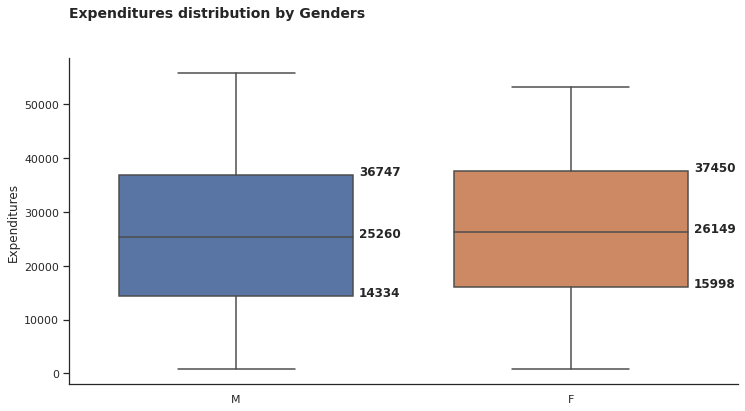

In [69]:
sns.set(rc={'figure.figsize':(12, 6)})
sns.set_style("white")

# Calculated indexes median, q1, q3, min, max to chart
median_list = customer_seg.groupby('Gender')['total_expenditures'].median()
q1_list = customer_seg.groupby('Gender')['total_expenditures'].quantile(0.25)
q3_list = customer_seg.groupby('Gender')['total_expenditures'].quantile(0.75)
min_list = customer_seg.groupby('Gender')['total_expenditures'].min()
max_list = customer_seg.groupby('Gender')['total_expenditures'].max()

# Draw boxplot
box_width=0.7
box1 = sns.boxplot(x='Gender', y='total_expenditures', data=customer_seg, width=box_width)

# show data
# show medians
i = 0
for i in range(len(median_list)):
    x = i+box_width/2*1.05
    y = median_list[len(median_list)-i-1]
    box1.annotate('%.0f' %median_list[len(median_list)-i-1], # do median_list thứ tự giá trị group_var ngược so với plot nên phải index như vậy
                  (x,y),
                  #color='white',
                  weight='semibold',
                  size=12
                 )
# show q1
i = 0
for i in range(len(q1_list)):
    x = i+box_width/2*1.05
    y = q1_list[len(q1_list)-i-1]
    box1.annotate('%.0f' %q1_list[len(q1_list)-i-1], # do q1_list thứ tự giá trị group_var ngược so với plot nên phải index như vậy
                  (x,y),
                  #color='white',
                  weight='semibold',
                  size=12
                 )
    
# show q3
i = 0
for i in range(len(q3_list)):
    x = i+box_width/2*1.05
    y = q3_list[len(q3_list)-i-1]
    box1.annotate('%.0f' %q3_list[len(q3_list)-i-1], # do q3_list thứ tự giá trị group_var ngược so với plot nên phải index như vậy
                  (x,y),
                  #color='white',
                  weight='semibold',
                  size=12
                 )
    
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    box1.spines[s].set_visible(False) 
    
# bỏ dấu tích ở trục x
box1.tick_params(left=True, bottom=False) 

# thêm title, label các trục và source:
plt.suptitle('Expenditures distribution by Genders', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('', size=12)
plt.ylabel('Expenditures', size=12)

plt.show()

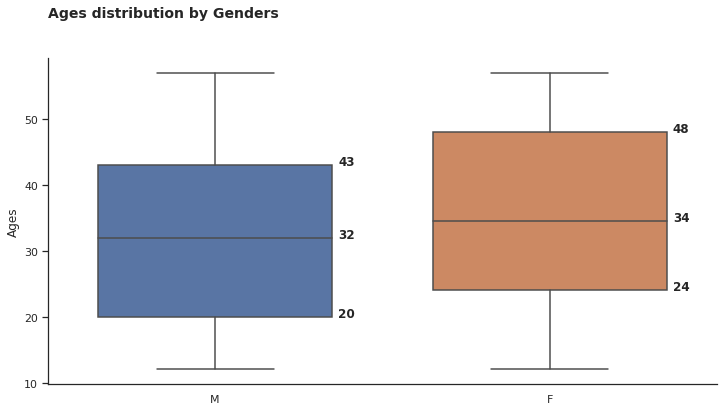

In [70]:
sns.set(rc={'figure.figsize':(12, 6)})
sns.set_style("white")

# Calculated indexes median, q1, q3, min, max to chart
median_list = customer_seg.groupby('Gender')['Age'].median()
q1_list = customer_seg.groupby('Gender')['Age'].quantile(0.25)
q3_list = customer_seg.groupby('Gender')['Age'].quantile(0.75)
min_list = customer_seg.groupby('Gender')['Age'].min()
max_list = customer_seg.groupby('Gender')['Age'].max()

# Draw boxplot
box_width=0.7
box1 = sns.boxplot(x='Gender', y='Age', data=customer_seg, width=box_width)

# show data
# show medians
i = 0
for i in range(len(median_list)):
    x = i+box_width/2*1.05
    y = median_list[len(median_list)-i-1]
    box1.annotate('%.0f' %median_list[len(median_list)-i-1], # do median_list thứ tự giá trị group_var ngược so với plot nên phải index như vậy
                  (x,y),
                  #color='white',
                  weight='semibold',
                  size=12
                 )
# show q1
i = 0
for i in range(len(q1_list)):
    x = i+box_width/2*1.05
    y = q1_list[len(q1_list)-i-1]
    box1.annotate('%.0f' %q1_list[len(q1_list)-i-1], # do q1_list thứ tự giá trị group_var ngược so với plot nên phải index như vậy
                  (x,y),
                  #color='white',
                  weight='semibold',
                  size=12
                 )
    
# show q3
i = 0
for i in range(len(q3_list)):
    x = i+box_width/2*1.05
    y = q3_list[len(q3_list)-i-1]
    box1.annotate('%.0f' %q3_list[len(q3_list)-i-1], # do q3_list thứ tự giá trị group_var ngược so với plot nên phải index như vậy
                  (x,y),
                  #color='white',
                  weight='semibold',
                  size=12
                 )
    
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    box1.spines[s].set_visible(False) 
    
# bỏ dấu tích ở trục x
box1.tick_params(left=True, bottom=False) 

# thêm title, label các trục và source:
plt.suptitle('Ages distribution by Genders', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('', size=12)
plt.ylabel('Ages', size=12)

plt.show()

**Kết luận**

- Không có sự khác biệt nhiều về mức chi tiêu giữa các khách hàng trung thành và không có outlier.

- Cả 4 thủ đô đều có mức chi tiêu từ hơn 10.000 (USD) đến gần 40.000 (USD). và không có sự khác biệt nhiều về mức chi tiêu cũng như không có outlier.

#### Data Preprocessing

##### Label Encoding

In [71]:
# kiểm tra định dạng dữ liệu
customer_seg.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('<M8[ns]')], dtype=object)

In [72]:
# tạo dữ liệu mới
segment = customer_seg.copy()
segment.head()

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,total_expenditures,Age,Loyalty,Gender
0,0,V0.296680287495188,L0.104646531512644,FR - France,1968-02-03,2015-12-18,N,32997,54,7,NaN
1,1,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,34948,13,7,M
2,2,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,17879,32,7,F
3,3,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,14603,48,7,M
4,4,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,37029,41,7,M


In [73]:
# Use the set calculation to get the columns of categorical features
num_cols = segment._get_numeric_data().columns
cat_cols = set(segment.columns) - set(num_cols)

print(list(cat_cols))

['Birthday', 'Country', 'Newsletter', 'LastName', 'FirstName', 'DateJoined', 'Gender']


In [74]:
#import data
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Encoder các feature catergory
le = LabelEncoder()

for i in cat_cols:
    segment[i] = segment[[i]].apply(le.fit_transform)
    
segment[cat_cols].head()

,Birthday,Country,Newsletter,LastName,FirstName,DateJoined,Gender
0,49,0,0,232,506,31,2
1,741,1,1,242,44,32,1
2,408,0,1,308,155,33,0
3,141,3,0,137,75,33,1
4,245,2,0,184,104,33,1


####Standardization

In [75]:
data_scaled = segment.copy()


# Newsletter, Loyalty and Gender fields contain limited values that are not suitable for customer clustering. 
# CustomerID, FirstName, LastName, Birthday, DateJoined fields don't contain much meaning to customers clustering.

drop_cols = ['CustomerID', 'Birthday', 'FirstName', 'LastName', 'DateJoined', 'Loyalty', 'Newsletter', 'Country', 'Gender']
data_scaled.drop(columns = drop_cols, axis = 1, inplace = True)

print(data_scaled.shape)

(770, 2)


In [76]:
data_scaled.head()

,total_expenditures,Age
0,32997,54
1,34948,13
2,17879,32
3,14603,48
4,37029,41


In [77]:
scale_cols = ['total_expenditures', 'Age']
ss = StandardScaler()

for col in scale_cols:
    data_scaled[col] = ss.fit_transform(data_scaled[[col]])
    
display(data_scaled.shape, data_scaled.head())

(770, 2)

,total_expenditures,Age
0,0.479662,1.544695
1,0.624054,-1.602718
2,-0.639206,-0.144161
3,-0.881660,1.084098
4,0.778067,0.546735


####Dimensionality Reduction

In [78]:
from sklearn.decomposition import PCA

variance_ratio = {}

for i in range(1, len(data_scaled.columns)+1):
    pca = PCA(n_components=i)
    pca.fit(data_scaled)
    variance_ratio[f'n_{i}'] = pca.explained_variance_ratio_.sum()

In [79]:
variance_ratio

{'n_1': 0.5033918545123577, 'n_2': 1.0}

In [81]:
from yellowbrick.cluster import KElbowVisualizer

# eigen value
eigen_value = np.sort(pca.explained_variance_)[::-1]

#plt.figure(figsize=(12, 5))

#plt.plot(variance_ratio.keys(), eigen_value)
#plt.ylim(0, 10, 1)
#plt.axhline(1, color = 'red', ls = '--')
#plt.title('Elbow Point')

#plt.show()


In [82]:
# eigen value
eigen_value

array([1.00809292, 0.99450786])

In [83]:
print(f'the number of eigenvalue greater than one: {len(eigen_value[eigen_value > 1])}')


the number of eigenvalue greater than one: 1


In [84]:
pca = PCA(n_components = 1, random_state = 42)

pca.fit(data_scaled)
data_pca = pd.DataFrame(pca.transform(data_scaled), 
                        columns = (["PC1"]))

data_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,770.0,-2.306957e-18,1.004038,-2.427659,-0.707849,0.012207,0.715837,2.433561


## K-Means algorithm

In [85]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer


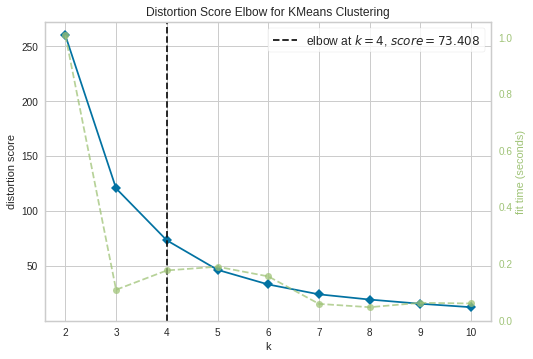

In [86]:
#Visualize KMeans Model
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(data_pca)
Elbow_M.show()

plt.show()

In [88]:
# fit model
km = KMeans(n_clusters=4, random_state=42)

yhat_AC = km.fit_predict(data_pca)

data_pca["Clusters"] = yhat_AC   # for evaluating the model
segment["Clusters"]= yhat_AC        # for customers profiling

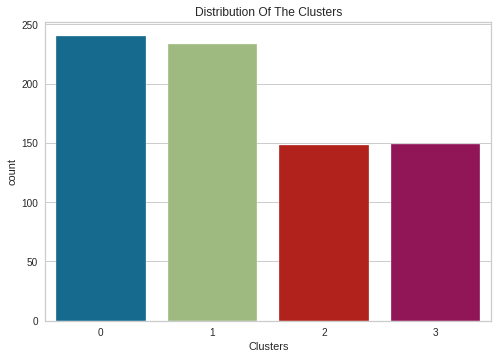

In [90]:
# Plotting countplot of clusters

ax = sns.countplot(x=segment["Clusters"])
ax.set_title("Distribution Of The Clusters")
plt.show()

In [92]:
pale = ['red', 'blue', 'green', 'orange'] #bảng màu

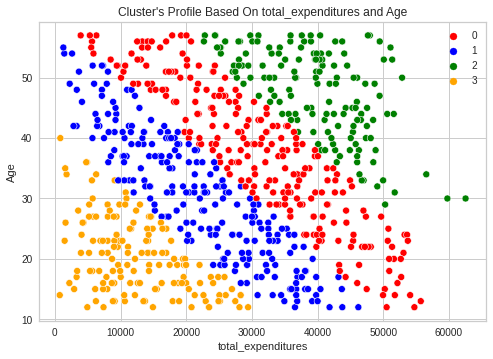

In [93]:
#Visual phân bố clustering
ax = sns.scatterplot(data = segment,x=segment["total_expenditures"], y=segment["Age"],hue=segment["Clusters"], palette=pale)
ax.set_title("Cluster's Profile Based On total_expenditures and Age")
plt.legend()
plt.show()

In [95]:
# Nhóm 1
cluster_0 = segment.loc[segment.Clusters ==0, ["CustomerID", "Age", "total_expenditures"]]
cluster_0.describe()

,CustomerID,Age,total_expenditures
count,240.000000,240.000000,240.000000
mean,389.450000,37.316667,31180.329167
std,220.857869,11.448983,12087.079859
min,3.000000,12.000000,3931.000000
25%,188.250000,29.000000,21973.500000
50%,390.000000,38.000000,31787.000000
75%,583.500000,47.000000,39694.750000
max,768.000000,57.000000,55717.000000


In [98]:
# Nhóm 2
cluster_1 = segment.loc[segment.Clusters ==1, ["CustomerID", "Age", "total_expenditures"]]
cluster_1.describe()

,CustomerID,Age,total_expenditures
count,233.000000,233.000000,233.000000
mean,385.085837,30.270386,22139.506438
std,220.752731,10.446490,10502.277996
min,1.000000,12.000000,1296.000000
25%,206.000000,22.000000,13615.000000
50%,396.000000,31.000000,22263.000000
75%,564.000000,38.000000,30431.000000
max,769.000000,55.000000,46214.000000


In [99]:
# Nhóm 3
cluster_2 = segment.loc[segment.Clusters ==2, ["CustomerID", "Age", "total_expenditures"]]
cluster_2.describe()

,CustomerID,Age,total_expenditures
count,148.000000,148.000000,148.000000
mean,367.621622,47.527027,39678.756757
std,229.659091,7.350733,7990.317767
min,0.000000,29.000000,22696.000000
25%,182.250000,43.000000,34193.750000
50%,353.000000,49.500000,40353.500000
75%,550.250000,54.000000,45852.000000
max,767.000000,57.000000,62539.000000


In [101]:
# Nhóm 4
cluster_3 = segment.loc[segment.Clusters ==3, ["CustomerID", "Age", "total_expenditures"]]
cluster_3.describe()

,CustomerID,Age,total_expenditures
count,149.000000,149.000000,149.000000
mean,392.375839,20.422819,12771.664430
std,221.633416,6.182125,6981.658147
min,13.000000,12.000000,745.000000
25%,202.000000,16.000000,7410.000000
50%,382.000000,19.000000,11476.000000
75%,587.000000,25.000000,17704.000000
max,764.000000,40.000000,29425.000000


#### Kết luận

Phân khúc khúc khác hàng được chia thành 4 nhóm gồm:

- `Nhóm 1` : Nhóm khách hàng từ 16 - 25 tuổi, có mức chi tiêu từ 7.500 - 18.000 USD (Cluster 3)
- `Nhóm 2`: Nhóm khách hàng từ 22 - 38 tuổi, có mức chi tiêu từ 14.000 - 31.000 USD (Cluster 1)
- `Nhóm 3`: Nhóm khách hàng từ 30 - 47 tuổi, có mức chi tiêu từ 22.000 - 40.000 USD (Cluster 0)
- `Nhóm 4`: Nhóm khách hàng từ 43 - 54 tuổi, có mức chi tiêu từ 34.000 - 46.000 USD (Cluster 2)